In [2]:
import os
import numpy as np
np.random.seed(1120)
from sklearn.model_selection import train_test_split
import cv2

top_path = 'mask_dataset/' # 안에 chin_mask , full_mask... 로 하위 폴더가 있는 상위 폴더 경로

save_path = 'mask_dataset_final/' # 저장할 경로 (안에 빈 train , test 폴더 먼저 만들어 놓고 실행)

folders = os.listdir(top_path)

for folder in folders:
    
    files = os.listdir(top_path+folder+'/')
    
    image_files = [file for file in files if file.endswith(".png")]
    
    image_1000 = image_files[-1000:]
    
    train,test = train_test_split(image_1000,test_size=0.1,random_state=1120)
    train,validate = train_test_split(train,test_size=(2/9),random_state=1120)
    
    for img in train:
        original=cv2.imread(top_path+folder+'/'+img)
        cv2.imwrite(save_path+'train/'+folder+'/'+img, original.copy())
        
    for img in validate:
        original=cv2.imread(top_path+folder+'/'+img)
        cv2.imwrite(save_path+'validate/'+folder+'/'+img, original.copy())
        
    for img in test:
        original=cv2.imread(top_path+folder+'/'+img)
        cv2.imwrite(save_path+'test/'+folder+'/'+img, original.copy())

In [3]:
train_img_path = "mask_dataset_final/train/"
categories = os.listdir(train_img_path)
num_classes = len(categories)

In [4]:
test_img_path = "mask_dataset_final/test/"
categories2 = os.listdir(test_img_path)
num_classes2 = len(categories2)

In [5]:
validate_img_path = "mask_dataset_final/validate/"
categories3 = os.listdir(validate_img_path)
num_classes3 = len(categories3)

In [6]:
X_train = []
Y_train = []
for idx, category in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idx] = 1
    img_path = train_img_path + category + '/'
  
    for dirpath, dirnames, filenames in os.walk(img_path):
        for filename in filenames:
#             print(img_path+filename, label)
            img = cv2.imread(img_path+filename)
            X_train.append(img/255)
            Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
X_test = []
Y_test = []
for idx, category in enumerate(categories2):
    label2 = [0 for i in range(num_classes2)]
    label2[idx] = 1
    img_path2 = test_img_path + category + '/'
  
    for dirpath, dirnames, filenames in os.walk(img_path2):
        for filename in filenames:
#             print(img_path+filename, label)
            img2 = cv2.imread(img_path2+filename)
            X_test.append(img2/255)
            Y_test.append(label2)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [8]:
X_validate = []
Y_validate = []
for idx, category in enumerate(categories3):
    label3 = [0 for i in range(num_classes3)]
    label3[idx] = 1
    img_path3 = validate_img_path + category + '/'
  
    for dirpath, dirnames, filenames in os.walk(img_path3):
        for filename in filenames:
#             print(img_path+filename, label)
            img3 = cv2.imread(img_path3+filename)
            X_validate.append(img3/255)
            Y_validate.append(label3)

X_validate = np.array(X_validate)
Y_validate = np.array(Y_validate)

In [9]:
X_train.shape

(2800, 90, 120, 3)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [19]:
# model = Sequential()

# model.add(Conv2D(64, 3, padding = 'same', activation = 'relu', input_shape = (90, 120, 3)))
# model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(2))

# model.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))
# model.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(2))

# model.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))
# model.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))
# model.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(2))

# # model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
# # model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
# # model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
# # model.add(MaxPooling2D(2))

# # model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
# # model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
# # model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
# # model.add(MaxPooling2D(2))

# model.add(Flatten())
# model.add(Dense(1024, activation = 'relu'))
# model.add(Dense(1024, activation = 'relu'))
# model.add(Dense(4, activation = 'softmax'))

In [20]:
# epochs = 10 -> 약 98.6%의 model
model = Sequential()

model.add(Conv2D(64, 3, padding = 'same', activation = 'relu', input_shape = (90, 120, 3)))
model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2))

# model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
# model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
# model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 90, 120, 64)       1792      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 90, 120, 64)       36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 45, 60, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 45, 60, 128)       73856     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 45, 60, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 22, 30, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 22, 30, 256)      

In [22]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# es = EarlyStopping(monitor = 'accuracy', mode = 'max', baseline = 99.5, verbose = 1, patience = 10)
# mc = ModelCheckpoint('best_VGGNET.h5', monitor = 'accuracy', mode = 'max', save_best_only = True)

In [23]:
history = model.fit(X_train, Y_train, validation_data = (X_validate, Y_validate), epochs = 50, verbose = 1)
# history = model.fit(X_train, Y_train, validation_data = (X_validate, Y_validate), epochs = 50, verbose = 1, callbacks = [es, mc])

Epoch 1/50
88/88 [==============================] - 1025s 12s/step - loss: 1.0667 - accuracy: 0.4868 - val_loss: 0.2961 - val_accuracy: 0.9663
Epoch 2/50
88/88 [==============================] - 1007s 11s/step - loss: 0.1816 - accuracy: 0.9632 - val_loss: 0.1053 - val_accuracy: 0.9775
Epoch 3/50
88/88 [==============================] - 1009s 11s/step - loss: 0.4795 - accuracy: 0.8982 - val_loss: 0.1030 - val_accuracy: 0.9812
Epoch 4/50
88/88 [==============================] - 1010s 11s/step - loss: 0.2637 - accuracy: 0.9175 - val_loss: 0.9718 - val_accuracy: 0.8487
Epoch 5/50
88/88 [==============================] - 1022s 12s/step - loss: 0.1554 - accuracy: 0.9643 - val_loss: 0.0984 - val_accuracy: 0.9775
Epoch 6/50
88/88 [==============================] - 997s 11s/step - loss: 0.0784 - accuracy: 0.9829 - val_loss: 0.0576 - val_accuracy: 0.9887
Epoch 7/50
88/88 [==============================] - 994s 11s/step - loss: 0.0566 - accuracy: 0.9850 - val_loss: 0.0575 - val_accuracy: 0.9900
E

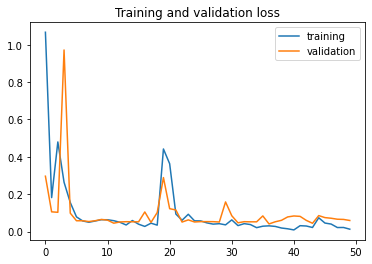

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper right')
plt.title('Training and validation loss')
plt.show()

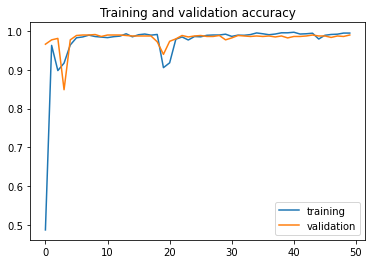

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 0)
plt.title('Training and validation accuracy')
plt.show()

In [26]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 31s 2s/step - loss: 0.0347 - accuracy: 0.9850


[0.034684158861637115, 0.9850000143051147]

In [27]:
from keras.models import load_model
model.save("from_VGGNET_final.h5")

In [29]:
model.save_weights("from_VGGNET_final_weights.h5")